In [12]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)



In [13]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [14]:
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

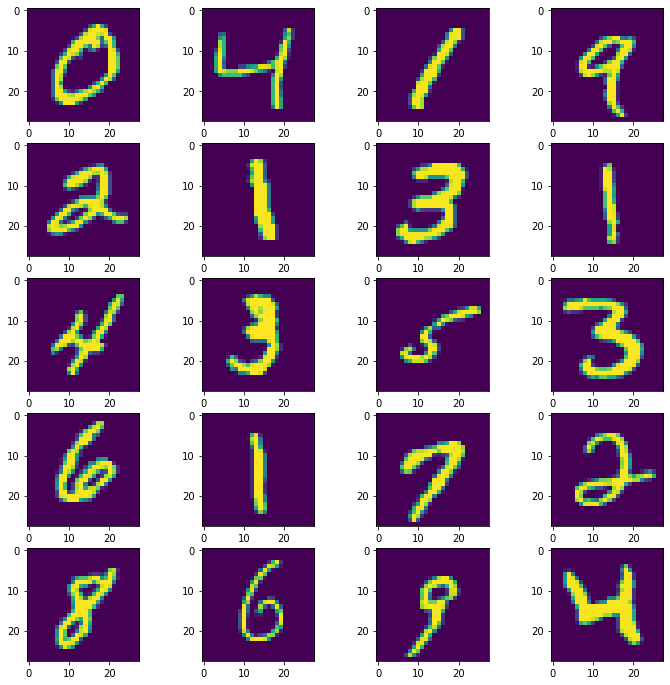

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

w=5
h=5
fig=plt.figure(figsize=(12, 12))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_images[i])
plt.show()

In [16]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(24, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(48, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(48, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(48, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.4560 - accuracy: 0.8583
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0588 - accuracy: 0.9820
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0391 - accuracy: 0.9875
Epoch 4/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0277 - accuracy: 0.9913
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0210 - accuracy: 0.9929


In [19]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0290 - accuracy: 0.9921


In [20]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32') /255

In [21]:
network = models.Sequential()
network.add(layers.Dense(512,activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation = 'softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                metrics=['accuracy'])
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
network.fit(train_images,train_labels,epochs =5, batch_size =128, verbose = 1)


Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.8765 - accuracy: 0.5271
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6411 - accuracy: 0.8455
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4267 - accuracy: 0.8844
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3591 - accuracy: 0.8989
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3235 - accuracy: 0.9072


In [23]:
test_loss, test_acc = network.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2994 - accuracy: 0.9151
